<a href="https://colab.research.google.com/github/jh941213/Naver_Boost_Study_13th/blob/main/%5Bboostcourse%5DWeek2_Mission_%EC%9C%A4%EC%A7%80%EC%98%81_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✨2주차 미션
### 📍미션 도전하기 전에
- 미션에 활용되는 데이터를 다운로드
- 나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있도록 설정

In [49]:
#  @title 미션에 활용되는 데이터
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

### 📍 Q1.전국 시도별 약국수를 구해주세요!
- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요.
- 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다.

In [ ]:
#  @title 데이터 살펴보기
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [ ]:
#  @title 데이터 컬럼 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [ ]:
#  @title loc을 활용해서 약국이 들어가는 시도명의 값 구하기
df_pharmacy = df.loc[df["상권업종소분류명"].str.contains("약국") ,"시도명"].value_counts()
df_pharmacy

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

In [2]:
#  @title 한글 깨짐 방지
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
plt.rc('font', family='NanumGothic')

['/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/L

<Axes: >

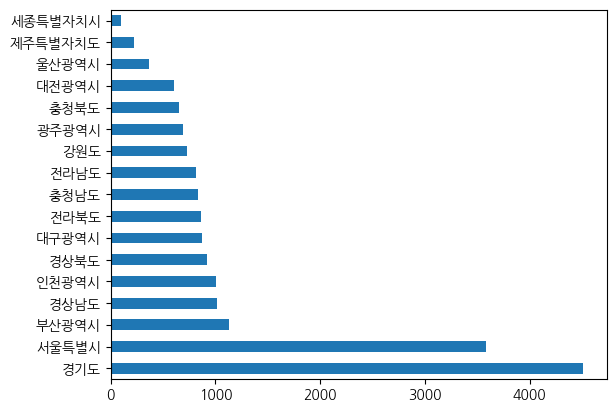

In [ ]:
#  @title 전국 시도별 약국 수 시각화
df_pharmacy.plot.barh()

### 📍 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
-  ❔고민해보기
  - 병원을 어떻게 정의할 것인가?
    - 출력은 소분류로 했으나 비교하는 부분은 소분류가 너무 세분화 되어 있어서 상권업종중분류명 column을 사용해서 시도별 분포 비교를 했다.
      - 약국/한의방
      - 수의업
      - 병원

In [ ]:
#  @title loc을 이용해서 시도 별 동물 병원 수 나타내기
df.loc[df["상권업종소분류명"]=="동물병원","시도명"].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

In [ ]:
#  @title 병원 약국 수의업을 가지고 비교해보자
df["상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

<Axes: title={'center': '시도별 수의업 분포'}>

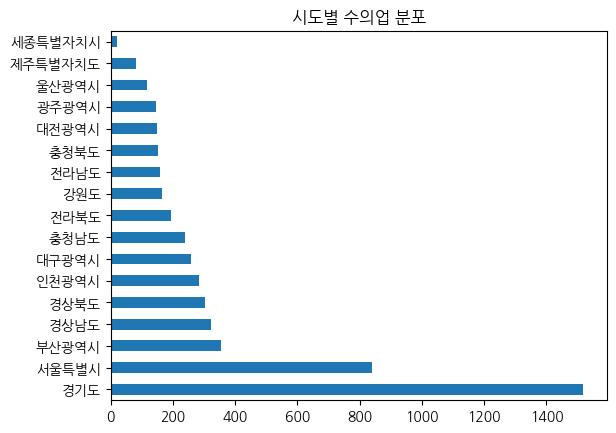

In [ ]:
#  @title 시도별 수의업 분포
df_animals = df.loc[df["상권업종중분류명"]=="수의업","시도명"].value_counts()
df_animals.plot.barh(title ="시도별 수의업 분포")

<Axes: title={'center': '시도별 약국/한의방 분포'}>

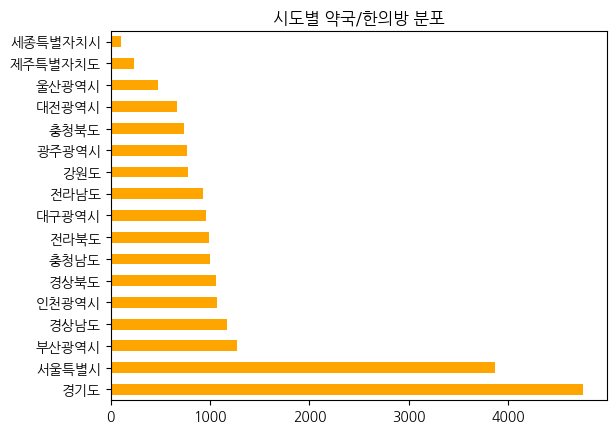

In [ ]:
#  @title 시도별 약국 한의방 분포
df_pharmacy = df.loc[df["상권업종중분류명"]=="약국/한약방","시도명"].value_counts()
df_pharmacy.plot.barh(color="orange",title ="시도별 약국/한의방 분포")

<Axes: title={'center': '시도별 병원 분포'}>

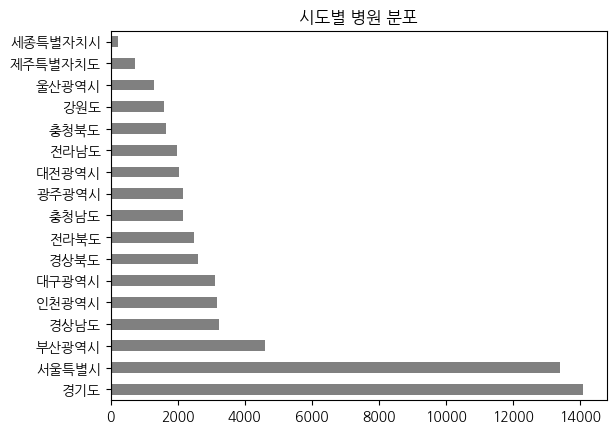

In [ ]:
#  @title 시도별 병원 분포
df_hospital = df.loc[df["상권업종중분류명"]=="병원","시도명"].value_counts()
df_hospital.plot.barh(color="gray" ,title ="시도별 병원 분포")

,수의업,약국/한약방,병원
경기도,1518,4754,14101
서울특별시,841,3864,13406
부산광역시,353,1273,4601
경상남도,323,1174,3218
경상북도,302,1059,2603


<Axes: title={'center': '약국, 병원, 수의업 시도별 분포 비교'}>

<Figure size 1000x800 with 0 Axes>

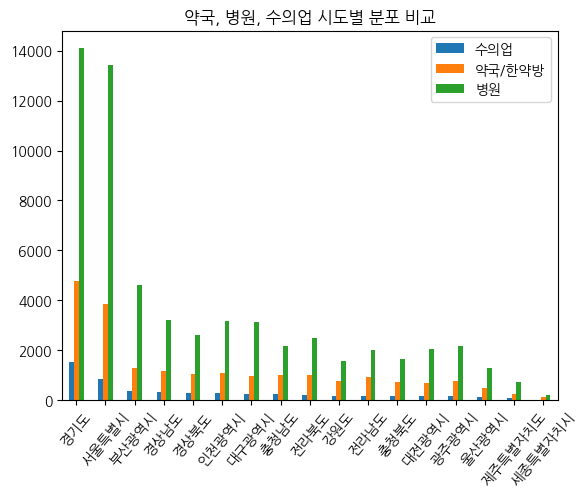

In [ ]:
#  @title 두가지 값을 barplot을 이용해서 비교해보자
import seaborn as sns
plt.figure(figsize = (10,8))
df_animals_pharmacy_plot = pd.DataFrame(df_animals).rename(columns={"시도명":"수의업"})
df_animals_pharmacy_plot["약국/한약방"] = df_pharmacy
df_animals_pharmacy_plot["병원"] = df_hospital
display(df_animals_pharmacy_plot.head(5))
df_animals_pharmacy_plot.plot.bar(rot = 50, title ="약국, 병원, 수의업 시도별 분포 비교")

In [ ]:
#  @title scatter 차트를 이용해서 위치를 비교해보자
condition =  (df["상권업종중분류명"]=="병원")|(df["상권업종중분류명"]=="약국/한약방")|(df["상권업종중분류명"]=="수의업")
df_location = df[condition]
display(df_location.head(1))


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


<Axes: xlabel='경도', ylabel='위도'>

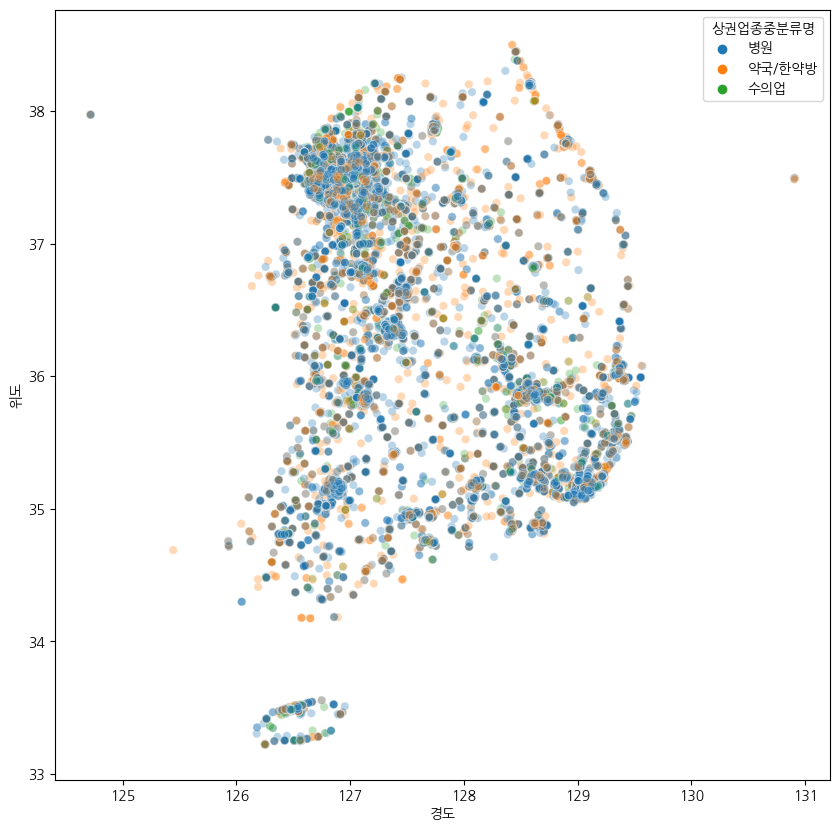

In [ ]:
#  @title 상업종중분류별 위치 분포
plt.figure(figsize=(10,10))
sns.scatterplot(data= df_location,x="경도",y="위도",hue="상권업종중분류명",alpha=0.3)

<Axes: xlabel='경도', ylabel='위도'>

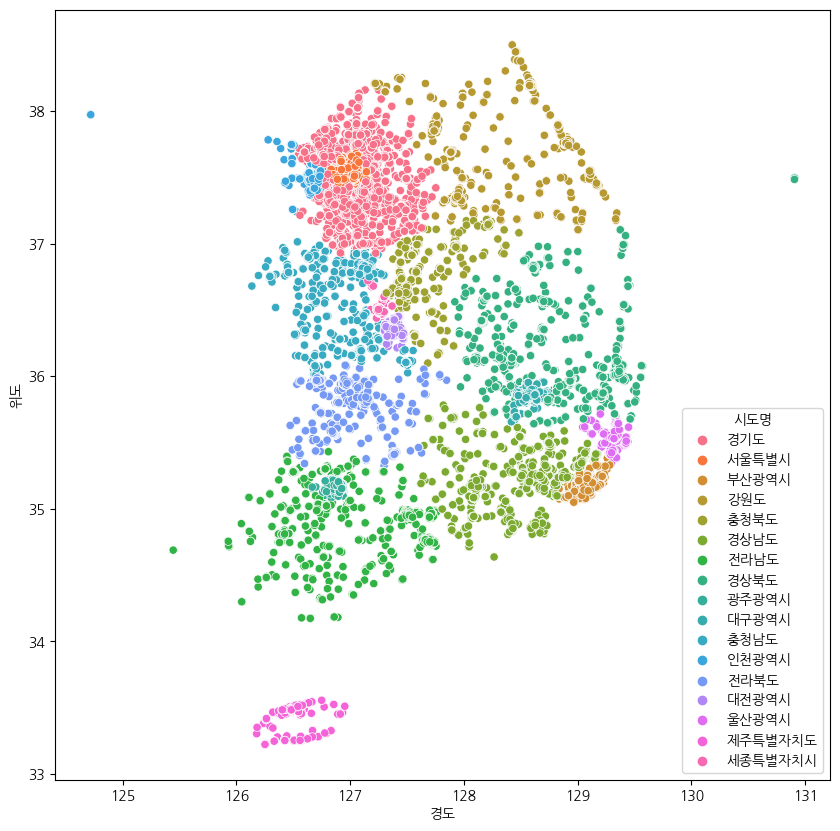

In [ ]:
#  @title 병원, 수의업, 약국/한약방 젠체적인 시도별 분포
plt.figure(figsize=(10,10))
sns.scatterplot(data= df_location,x="경도",y="위도",hue="시도명")

- 전체적으로 모두 서울 경기지역에 몰려있다.
- 약국과 수의업은 시도별로 크기는 차이가 나지만 시도별 비율은 비슷하게 분포하고 있다.
- 병원도 비슷하지만 약국과 수의업보다 대구,인천광역시가 시도별 비율이 크지는 않지만 더 높게 분포하고 있다
- 오프라인 서비스를 위한 사업을 한다면, 수도권에 반려 동물의 상권이 잘 갖춰져 있기 때문에 수도권에서 반려동물을 키우는 사람이나 가구의 지역 분포를 함께 살펴본다면 조금 더 구체적인 문제정의가 가능할 것 같다.

### 📍 Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
- **서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명**을 찾아 구해주세요!
- **피부과 성형외과 수 / 전체병원 수 로 비율**을 구해주세요!
- 비율이 **높은 순서대로 정렬**되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은** pandas round** 로 검색해서 사용법을 알아보세요!

In [7]:
# 피부나 성형이 들어간 분류명
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [43]:
#  @title 서울특별시에 병원인 조건
seoul_hospital_condition =(df["시도명"] == "서울특별시")&(df["상권업종중분류명"]=="병원")
skin_medi =(df['상권업종소분류명'].str.contains("피부"))
plastic_medi = ((df['상권업종소분류명'].str.contains("성형"))&(~df['상호명'].str.contains("정형")))

# 서울특별시 병원이면서 피부나 성형이 들어간 data 크기
total_hospital = df[seoul_hospital_condition&(skin_medi|plastic_medi)].shape[0]
total_hospital

1127

In [45]:
from pandas.core.reshape.pivot import pivot_table
#  @title 상권 업종 소분류명에서 피부나 성형이 들어간 분류명 구하기

medi_pivot_t = df[seoul_hospital_condition].loc[ skin_medi | plastic_medi,"시군구명"].value_counts()
medi_pivot_t

강남구     575
서초구     174
송파구      33
마포구      29
강동구      29
광진구      27
영등포구     25
중구       25
서대문구     23
강서구      21
성북구      21
은평구      20
양천구      19
동대문구     15
노원구      15
중랑구      11
성동구      10
동작구      10
관악구      10
구로구       9
용산구       8
강북구       7
종로구       7
금천구       2
도봉구       2
Name: 시군구명, dtype: int64

In [47]:
#  @title 판다스 round로 비율 구하기
round(medi_pivot_t/total_hospital,3)

강남구     0.510
서초구     0.154
송파구     0.029
마포구     0.026
강동구     0.026
광진구     0.024
영등포구    0.022
중구      0.022
서대문구    0.020
강서구     0.019
성북구     0.019
은평구     0.018
양천구     0.017
동대문구    0.013
노원구     0.013
중랑구     0.010
성동구     0.009
동작구     0.009
관악구     0.009
구로구     0.008
용산구     0.007
강북구     0.006
종로구     0.006
금천구     0.002
도봉구     0.002
Name: 시군구명, dtype: float64

### 📍 Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.
- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- 📄 문서
  - folium 문서 : https://python-visualization.github.io/folium/quickstart.html


In [53]:
# @title 노인 / 치매 병원 dataframe 만들기
import folium

senior = df[df["상권업종소분류명"]=="노인/치매병원"]
senior.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154


In [74]:
# @title 노인/ 치매 병원으로 분류되어 있으나 장례식장 등등 포함되어 있어 한번 더 확인
drop_not_senior_index = senior.loc[senior["상호명"].str.contains("장례"),"상호명"].index.tolist()
drop_not_senior_index

[2552,
 2557,
 2568,
 3854,
 4390,
 5263,
 5640,
 5961,
 6114,
 15940,
 21357,
 31823,
 32225,
 37121,
 59211,
 59275,
 60983,
 64950,
 66360,
 68938,
 70072,
 71859,
 71926,
 73299,
 73773,
 74305,
 74815,
 74916,
 76150,
 76403,
 81599,
 83587,
 85246,
 88956,
 89029,
 90115,
 90117]

In [76]:
senior = senior.drop(drop_not_senior_index,axis=0)
senior.shape

(1018, 39)

In [77]:
# @title 노인 치매병원 평균 위치 표기
senior_a = senior["위도"].mean()
senior_g = senior["경도"].mean()
senior_map = folium.Map([senior_a,senior_g],zoom_start=12)
folium.Marker([senior_a,senior_g],tooltip="노인/치매병원 평균").add_to(senior_map)
senior_map

In [78]:
senior["위도"].mean()

36.32713589642054

In [79]:
# @title folium으로 노인 치매 병원 지도 위에 표기
for i in range(0,senior.shape[0]):
  senior_a = senior["위도"].iloc[i]
  senior_g = senior["경도"].iloc[i]
  tooltip = senior["상호명"].iloc[i]
  folium.Marker([senior_a,senior_g],tooltip=tooltip).add_to(senior_map)
senior_map